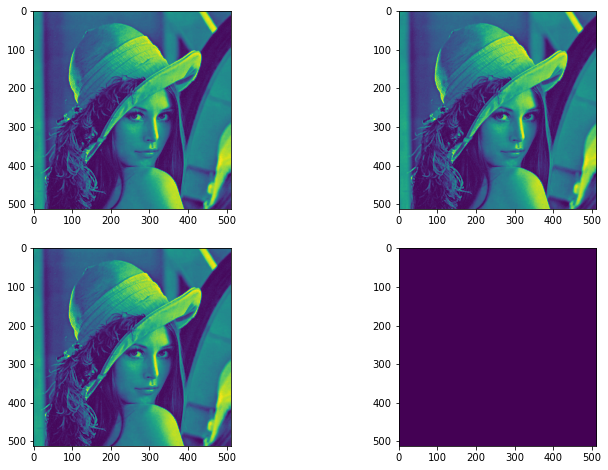

In [2]:
import matplotlib.pyplot as plt
from os.path import join
# Charger les données
image = plt.imread(join("..","data","lena.png") )

plt.figure(figsize=(12,8))
for n in range(image.shape[2]):
    plt.subplot(2,2,n+1)
    plt.imshow(image[:,:,n])    

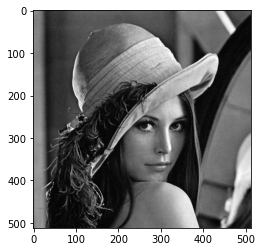

In [4]:
import numpy as np
lena = np.sum(image,axis=2)
lena = lena - lena.min()
lena = lena / lena.max()

plt.imshow(lena,cmap="gray")

In [5]:
lena.shape

(512, 512)

SINGULAR VALUE DECOMPOSITION

0.7070769

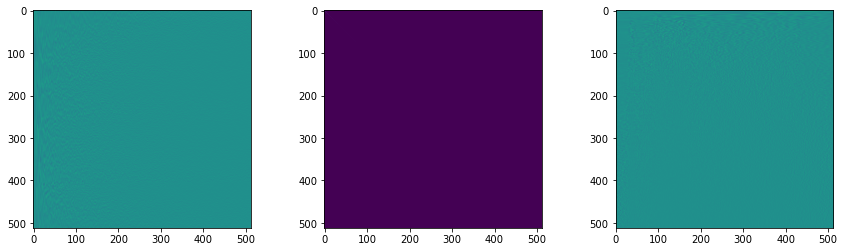

In [11]:
from numpy.linalg import svd

U,S,Vh = svd(lena)
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.imshow( U )

plt.subplot(1,4,2)
plt.imshow( S*np.eye(512) )

plt.subplot(1,4,3)
plt.imshow( Vh )





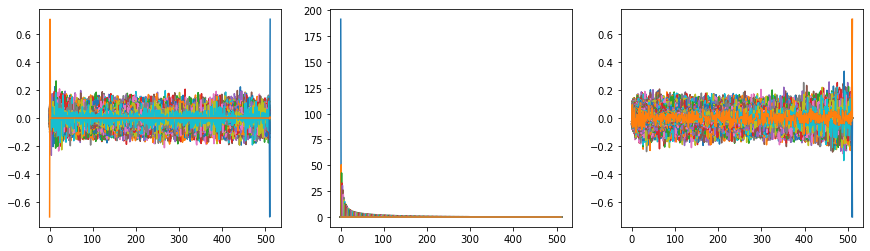

In [12]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.plot( U )

plt.subplot(1,4,2)
plt.plot( S*np.eye(512) )

plt.subplot(1,4,3)
plt.plot( Vh )

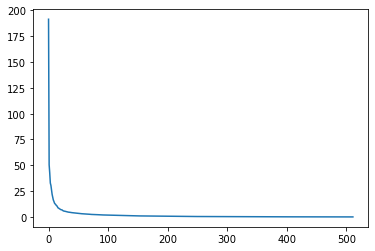

In [13]:
plt.plot( S )

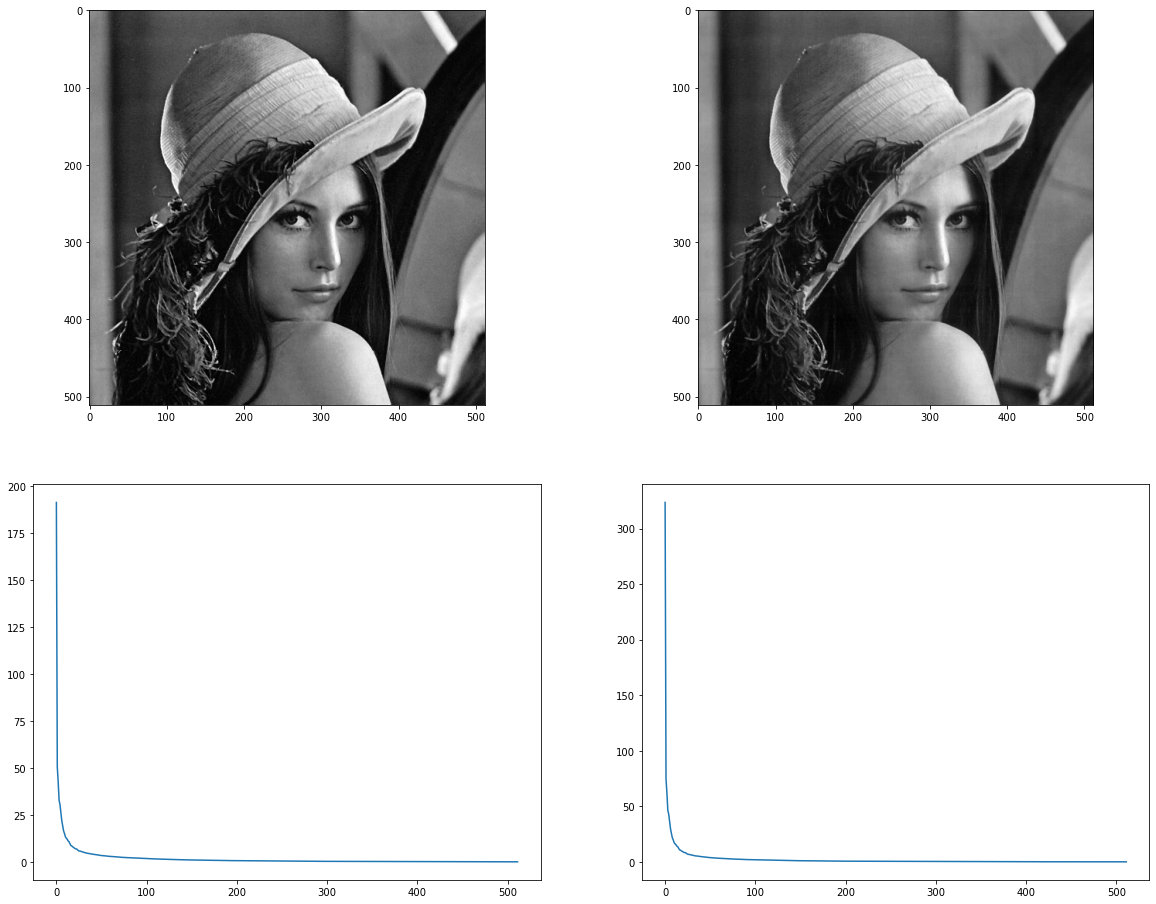

In [72]:
ordre = 512 

S2 = np.power(S,1.1)

lena_2 = np.dot(U, np.dot(np.diag( S2 ), Vh))

plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.imshow( lena,cmap="gray" )

plt.subplot(2,2,2)
plt.imshow( lena_2,cmap="gray" )

plt.subplot(2,2,3)
plt.plot( S )

plt.subplot(2,2,4)
plt.plot( S2 )




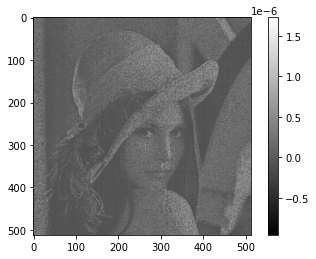

In [18]:
plt.imshow( lena - lena_2,cmap="gray" )
plt.colorbar()

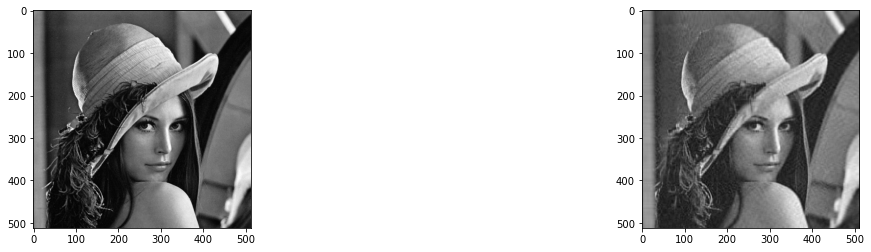

In [47]:
ordre = 50

lena_2 = np.dot(U[:,:ordre+1], np.dot(np.diag(S[:ordre+1]), Vh[:ordre+1,:]))

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow( lena,cmap="gray" )

plt.subplot(1,2,2)
plt.imshow( lena_2,cmap="gray" )

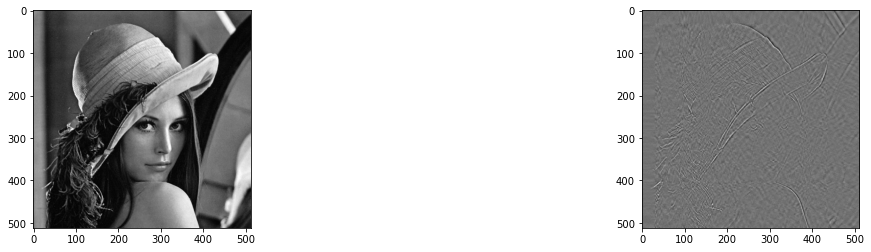

In [46]:
ordre = 50

lena_2 = np.dot(U[:,ordre+1:], np.dot(np.diag(S[ordre+1:]), Vh[ordre+1:,:]))

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow( lena,cmap="gray" )

plt.subplot(1,2,2)
plt.imshow( lena_2,cmap="gray" )

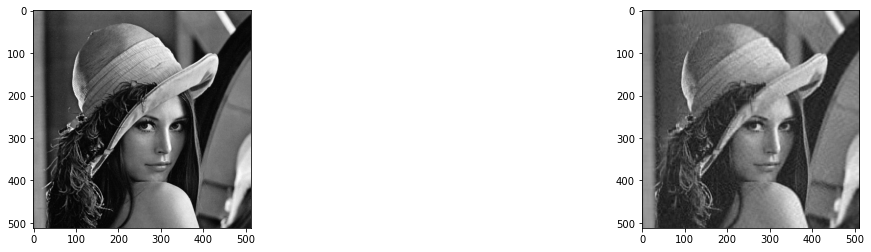

In [53]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(lena)
X2 = pca.transform(lena)
lena_3 = pca.inverse_transform(X2)

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.imshow( lena,cmap="gray" )

plt.subplot(1,2,2)
plt.imshow( lena_3,cmap="gray" )


In [54]:
from sklearn.datasets import load_digits


# Chargez le jeu de données MNIST
digits = load_digits()
X, y = digits["data"], digits["target"]

In [61]:
y == 0

array([ True, False, False, ..., False, False, False])

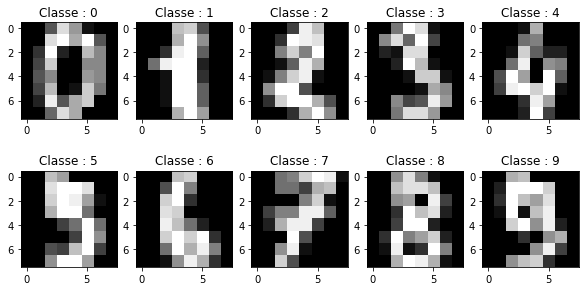

In [55]:
from matplotlib import pyplot as plt 
import seaborn as sns

# Affichez quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Classe : {y[i]}")
plt.show()

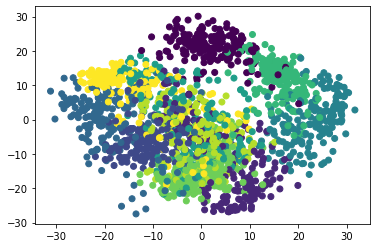

In [59]:
pca = PCA(n_components=2)
pca.fit(X)
X2 = pca.transform(X)
X2.shape

plt.scatter(X2[:,0],X2[:,1],c=y)

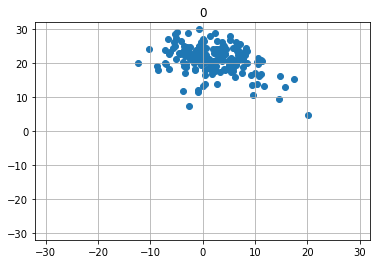

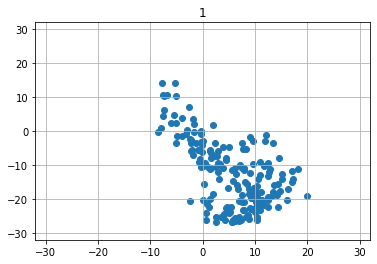

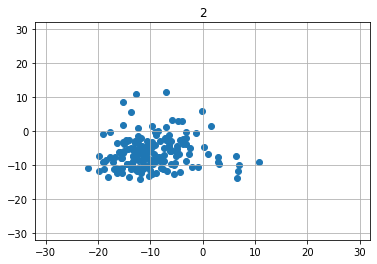

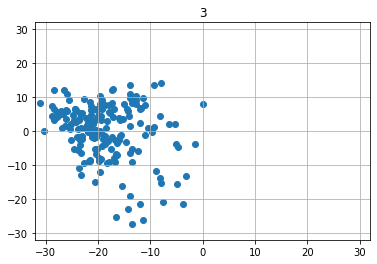

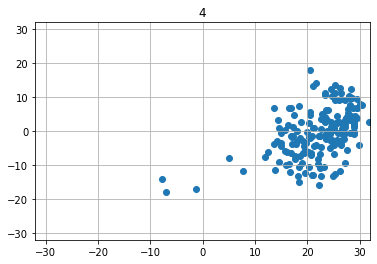

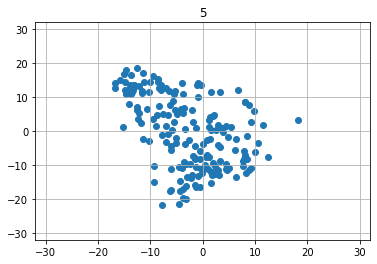

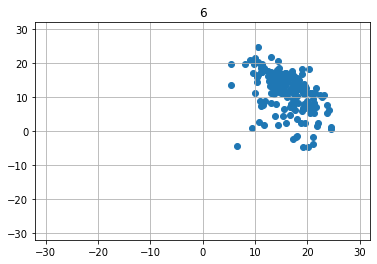

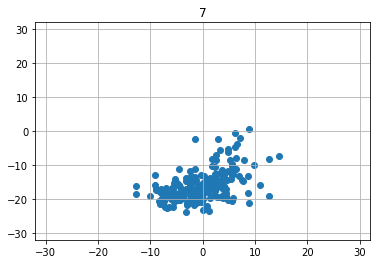

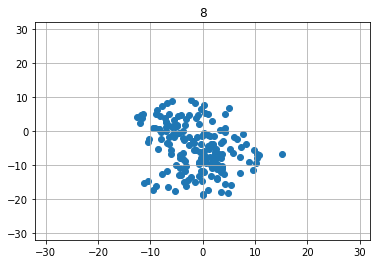

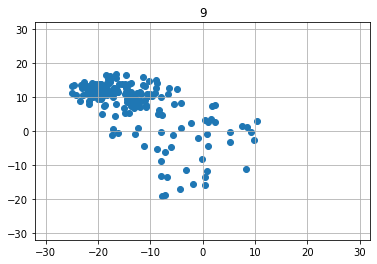

In [65]:
for n in range(10):
    plt.figure()
    indice = y==n
    plt.scatter(X2[indice,0],X2[indice,1])
    plt.xlim((-32,32))
    plt.ylim((-32,32))
    plt.grid()
    plt.title(n)


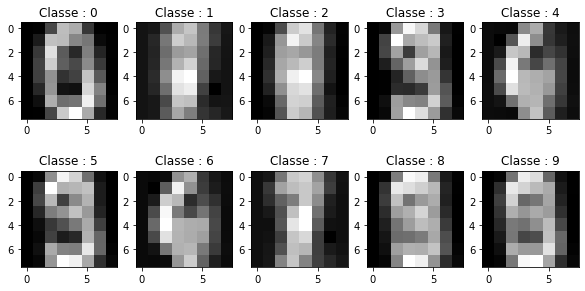

In [73]:
X3 = pca.inverse_transform(X2)

# Affichez quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X3[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Classe : {y[i]}")
plt.show()

